In [52]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [11]:
tv = pd.read_csv('tvmarketing.csv')
ad = tv.copy()
print(type(ad))

<class 'pandas.core.frame.DataFrame'>


In [12]:
ad

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [13]:
ad.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [14]:
ad.head()
ad.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [15]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [17]:
ad.shape

(200, 2)

In [19]:
ad.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


/Users/maheeprg/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


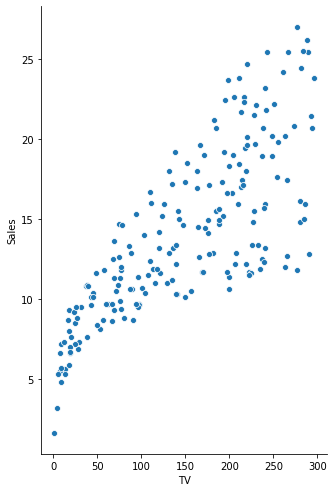

In [21]:
sns.pairplot(ad, x_vars=['TV'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [23]:
x = ad['TV'] 
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [24]:
y = ad['Sales'] 
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [30]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'. 

x_train = x_train[:, np.newaxis] 
x_test = x_test[:, np.newaxis]

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [38]:
lr = LinearRegression()

In [39]:
mod1 = lr.fit(x_train, y_train)

In [40]:
# Print the intercept and coefficients 
print(lr.intercept_) 
print(lr.coef_)

6.989665857411679
[0.04649736]


In [41]:
# Making predictions on the testing set 
y_pred = lr.predict(x_test)

In [42]:
type(y_pred)

numpy.ndarray

In [43]:
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

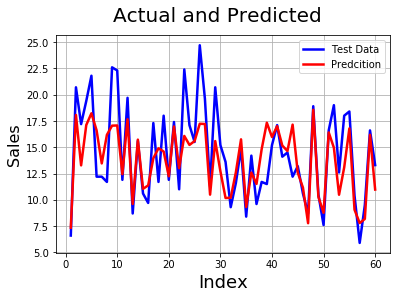

In [50]:
# Actual vs Predicted 
c = [i for i in range(1,61,1)]
# generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-", label = "Test Data") 
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-", label = "Predcition")
plt.legend()
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=18) # X-label 
plt.ylabel('Sales', fontsize=16)
plt.grid()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred) 
r_squared = r2_score(y_test, y_pred) 
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

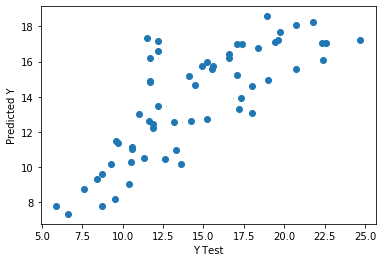

In [53]:
plt.scatter(y_test,y_pred) 
plt.xlabel('Y Test') 
plt.ylabel('Predicted Y')